# preprocessing

In [34]:
from preprocess import *

In [36]:
# convert_brats_data("data/original", "data/preprocessed")
brats_folder, out_folder = "data/original", "data/preprocessed"

In [37]:
for subject_folder in glob.glob(os.path.join(brats_folder, "*", "*")):
    print(subject_folder)

data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-DU-A5TW
data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-DU-7014
data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-DU-6542
data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-DU-5851
data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-HT-8111
data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-DU-5874
data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-DU-7301
data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-DU-7304
data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-DU-6404
data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-FG-A4MT
data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-HT-8563
data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-DU-7306
data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-CS-4944
data/original/Pre-operative_TCGA_LGG_N

In [38]:
subject_folder = "data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-HT-8563"

subject = os.path.basename(subject_folder)

new_subject_folder = os.path.join(out_folder, os.path.basename(os.path.dirname(subject_folder)),
                                  subject)

# convert_brats_folder(subject_folder, new_subject_folder,
#                      no_bias_correction_modalities=("flair",))

# Inspect data

In [39]:
import nibabel
import numpy as np
from skimage import morphology
import matplotlib.pyplot as plt

In [41]:
subject_folder, new_subject_folder

('data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-HT-8563',
 'data/preprocessed/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-HT-8563')

## original data

In [118]:
original_data_list = glob.glob(os.path.join(subject_folder, "*"))
original_data_list

['data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-HT-8563/TCGA-HT-8563_1998.12.09_t1Gd.nii.gz',
 'data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-HT-8563/TCGA-HT-8563_1998.12.09_flair.nii.gz',
 'data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-HT-8563/TCGA-HT-8563_1998.12.09_t1.nii.gz',
 'data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-HT-8563/TCGA-HT-8563_1998.12.09_GlistrBoost.nii.gz',
 'data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-HT-8563/TCGA-HT-8563_1998.12.09_GlistrBoost_ManuallyCorrected.nii.gz',
 'data/original/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-HT-8563/TCGA-HT-8563_1998.12.09_t2.nii.gz']

In [126]:
ctscan = nibabel.load(original_data_list[0])

img_ctscan = np.array(ctscan.get_data(), dtype=np.float)
img_ctscan.shape, img_ctscan.dtype
img_ctscan.min(), img_ctscan.max()

(0.0, 8278.0)

In [116]:
def show_data(data_list, ncol = 10):

    nrow = len(data_list)
    fig, axs = plt.subplots(nrow, ncol)

    fig.set_figheight(nrow*4)
    fig.set_figwidth(ncol*4)
    counter = 0
    for i, scan in enumerate(data_list):
        base = os.path.basename(scan)
        indices = [i for i, a in enumerate(base) if a == "_"]
        if len(indices) > 1:
            title = base[indices[1]+1:]
        else:
            title = base
        img_ctscan = np.array(nibabel.load(scan).get_data(), dtype=np.float)
        cut_depth = np.linspace(0, img_ctscan.shape[2]-1, ncol, dtype=np.int)
        for j in range(ncol):
            axs.flatten()[counter].imshow(img_ctscan[:, :, cut_depth[j]], cmap=plt.cm.gray)
            axs.flatten()[counter].set_title(title)
            counter += 1

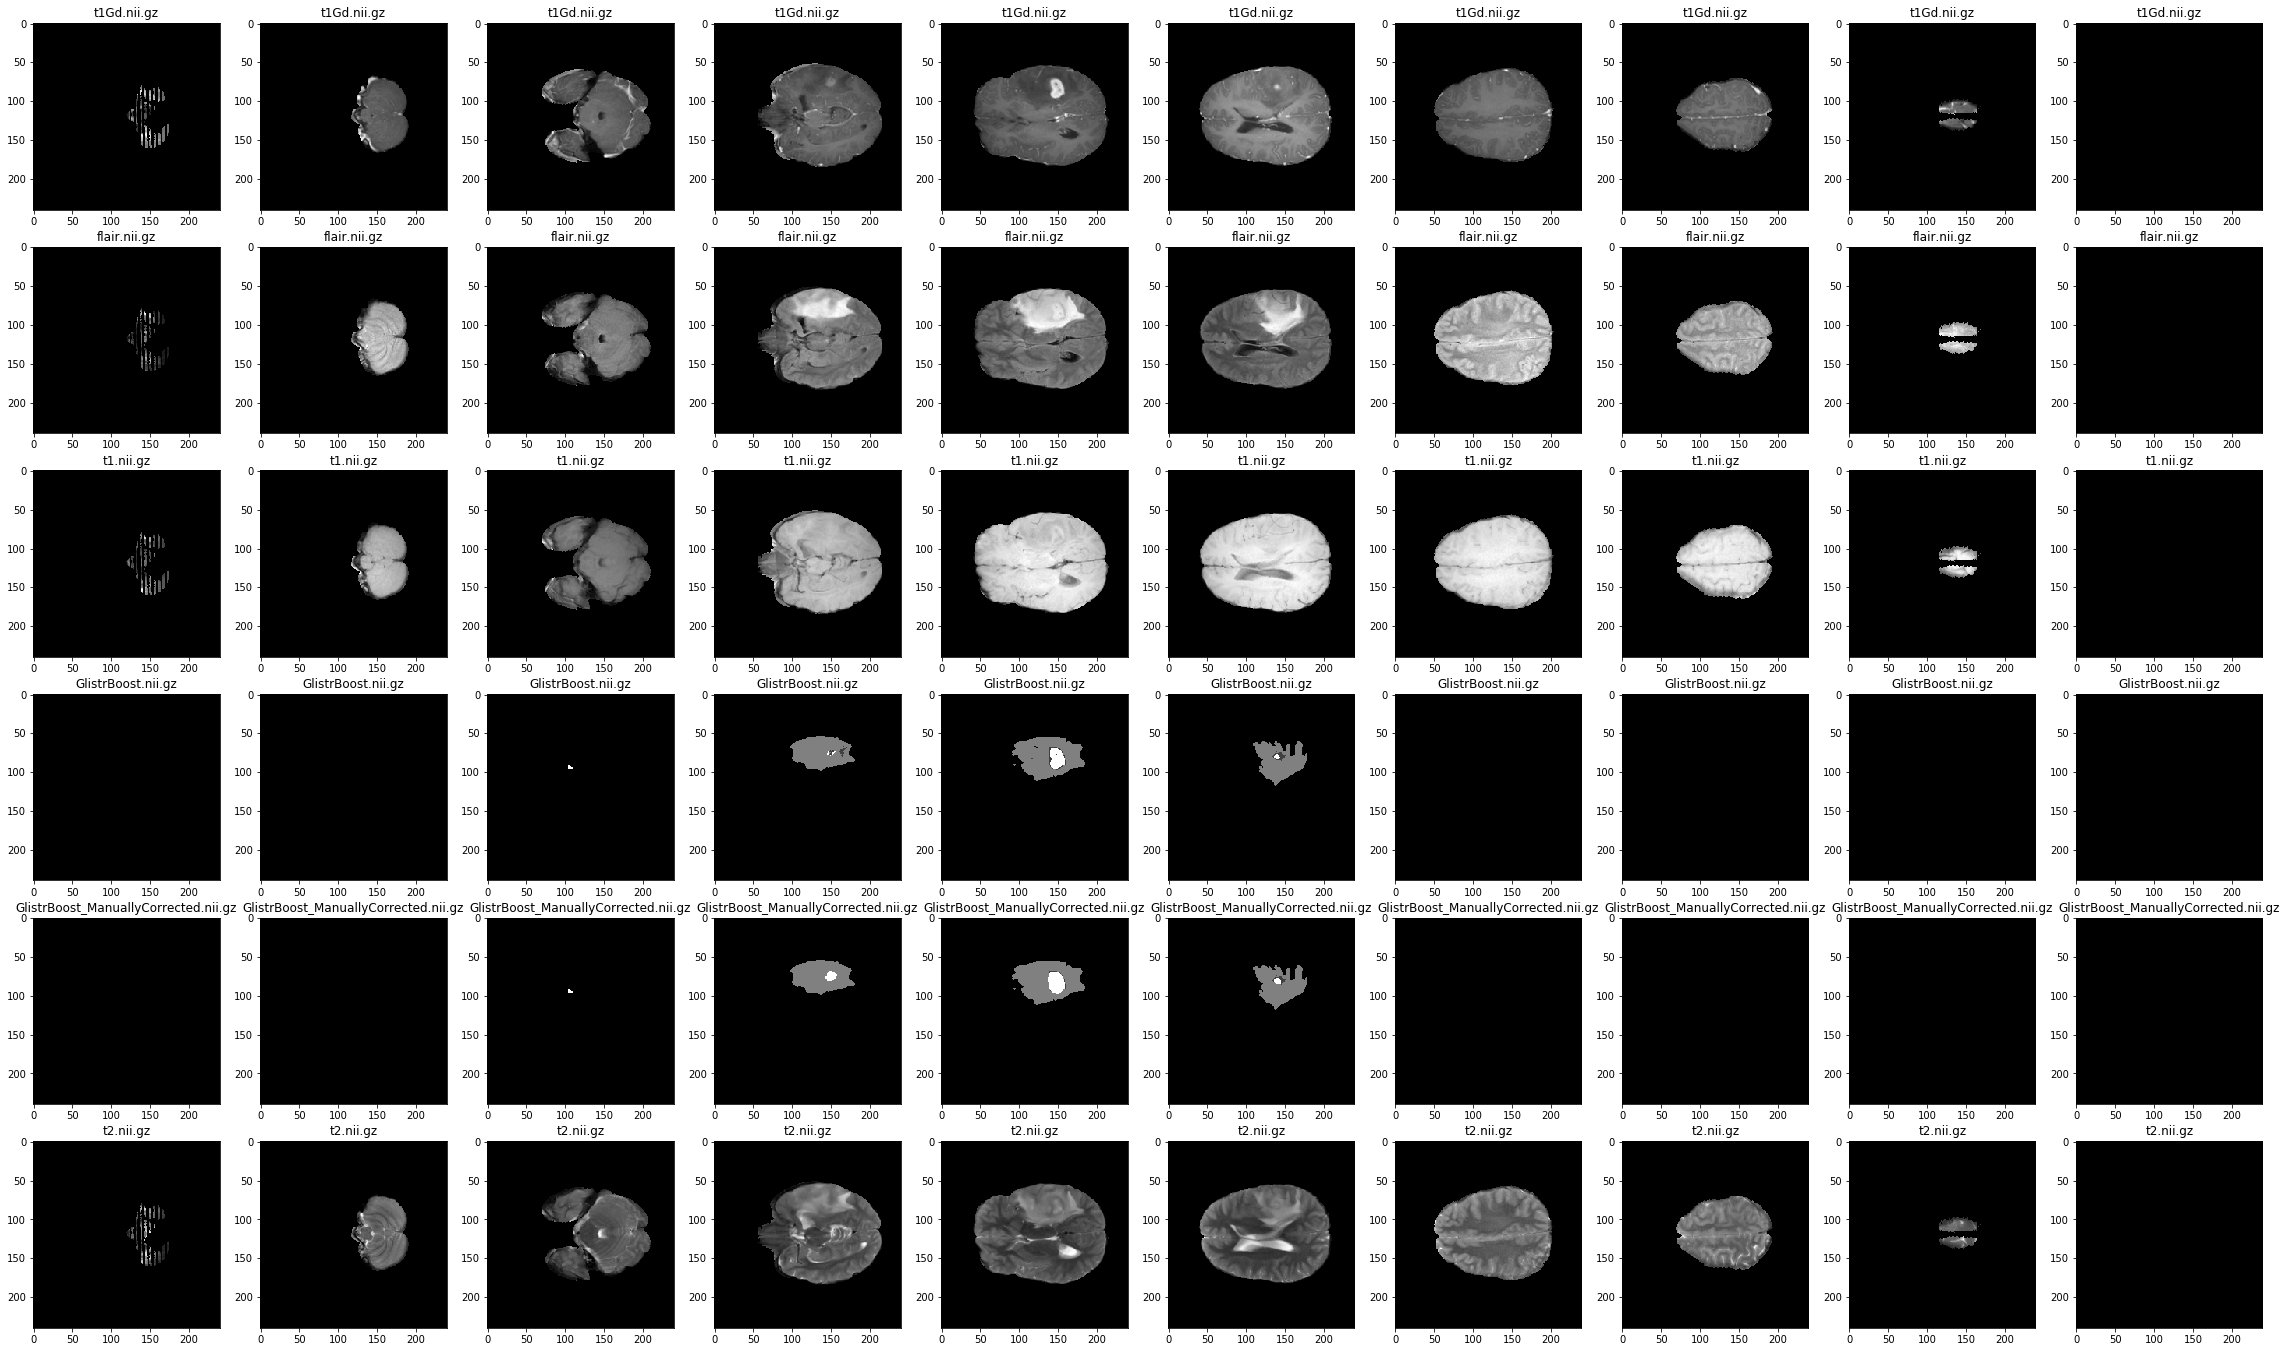

In [119]:
show_data(original_data_list)

# processed data

In [120]:
processed_data_list = glob.glob(os.path.join(new_subject_folder, "*"))
processed_data_list

['data/preprocessed/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-HT-8563/t2.nii.gz',
 'data/preprocessed/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-HT-8563/flair.nii.gz',
 'data/preprocessed/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-HT-8563/t1.nii.gz',
 'data/preprocessed/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-HT-8563/truth.nii.gz',
 'data/preprocessed/Pre-operative_TCGA_LGG_NIfTI_and_Segmentations/TCGA-HT-8563/t1ce.nii.gz']

In [128]:
ctscan = nibabel.load(processed_data_list[4])

img_ctscan = np.array(ctscan.get_data(), dtype=np.float)
img_ctscan.shape, img_ctscan.dtype
img_ctscan.min(), img_ctscan.max()

(0.0, 7524.166015625)

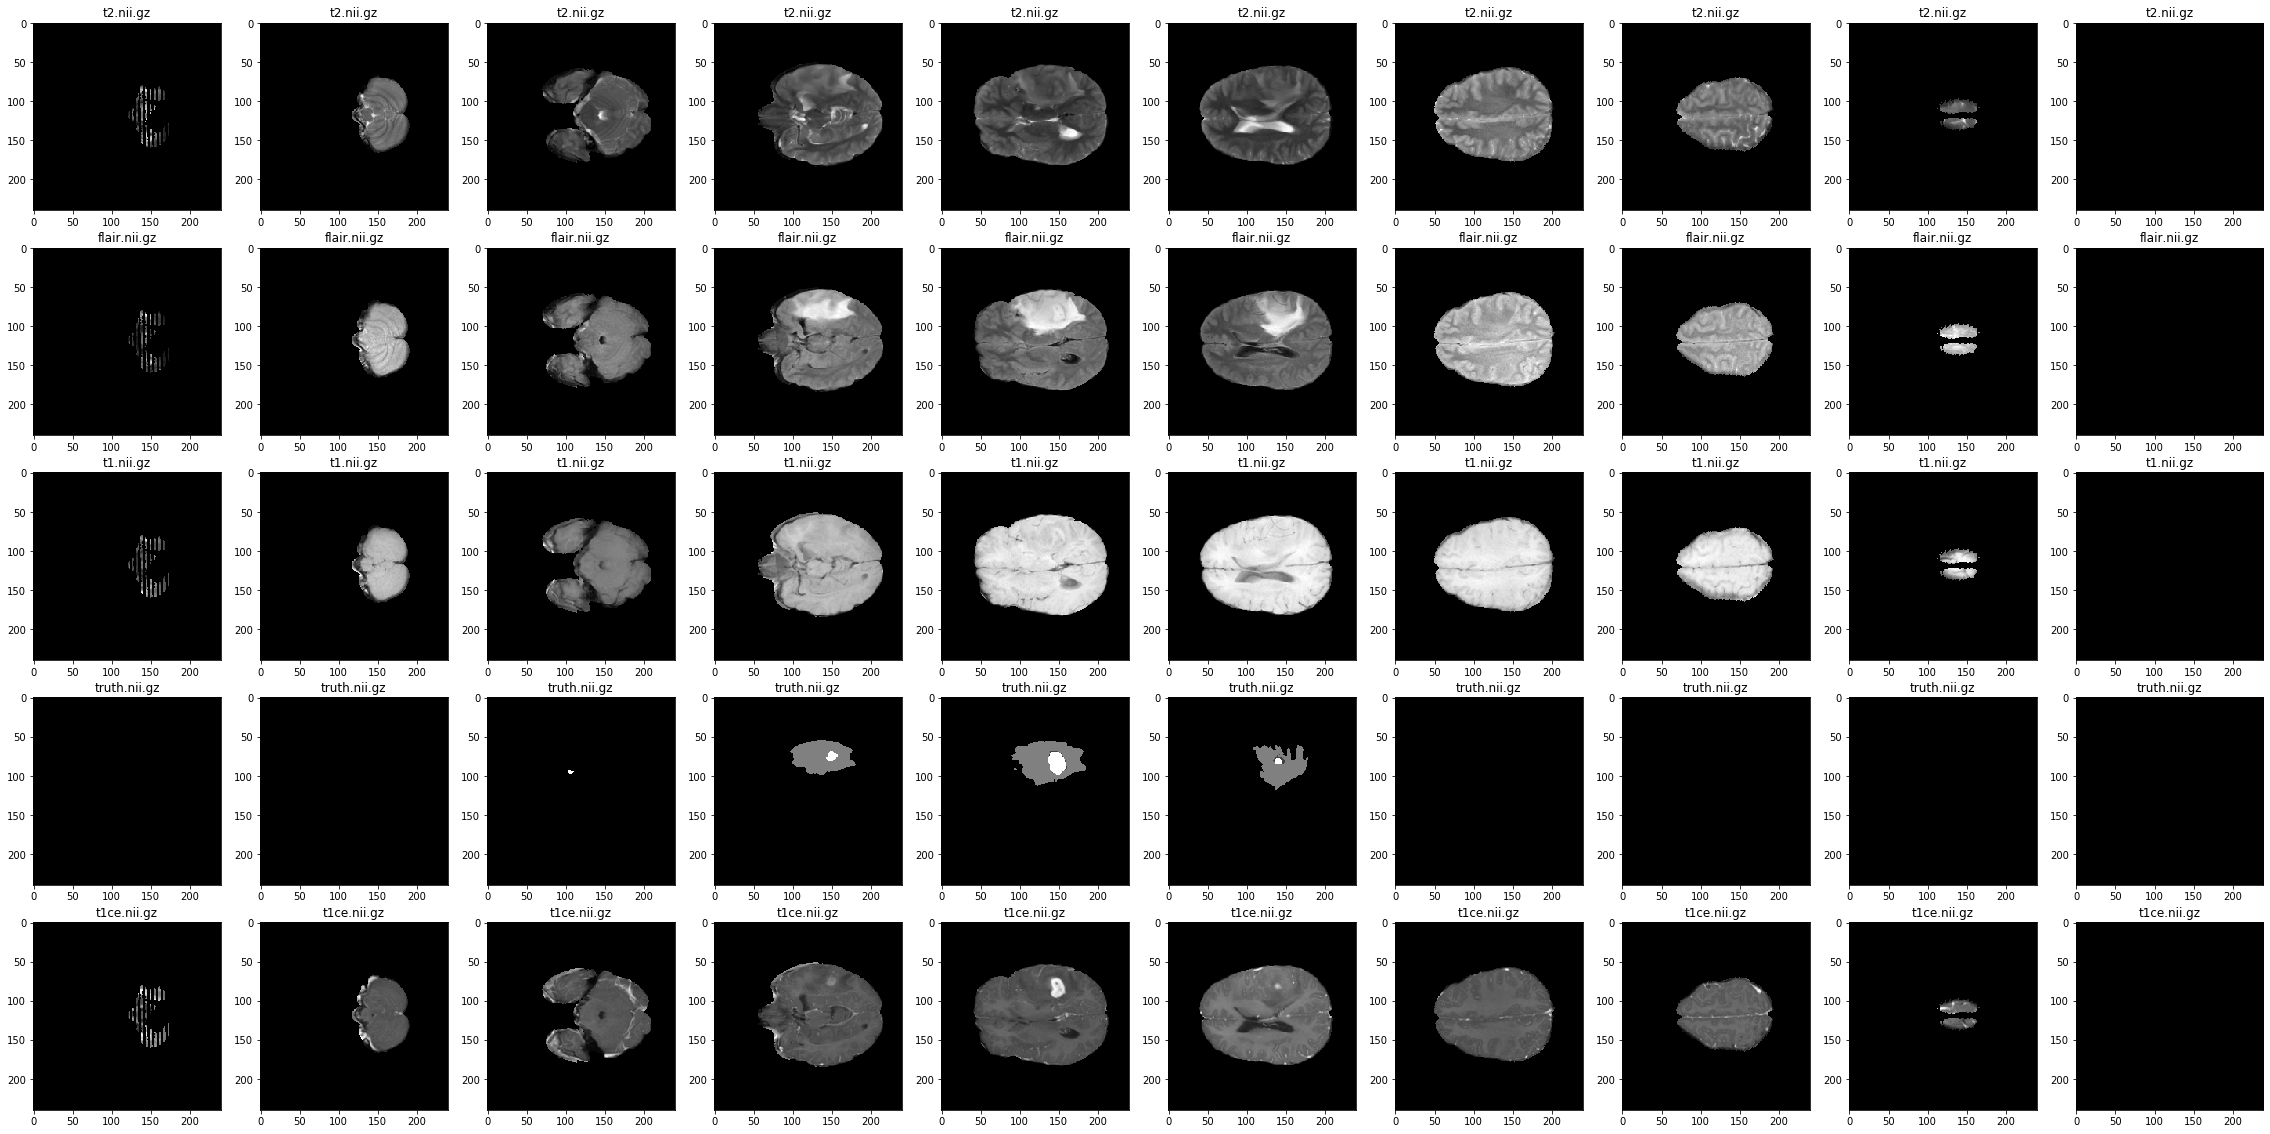

In [121]:
show_data(processed_data_list)

# training

In [18]:
import os
import glob

from unet3d.data import write_data_to_file, open_data_file
from unet3d.generator import get_training_and_validation_generators
from unet3d.model import isensee2017_model
from unet3d.training import load_old_model, train_model


config = dict()
config["image_shape"] = (128, 128, 128)  # This determines what shape the images will be cropped/resampled to.
config["patch_shape"] = None  # switch to None to train on the whole image
config["labels"] = (1, 2, 4)  # the label numbers on the input image
config["n_base_filters"] = 16
config["n_labels"] = len(config["labels"])
config["all_modalities"] = ["t1", "t1ce", "flair", "t2"]
config["training_modalities"] = config["all_modalities"]  # change this if you want to only use some of the modalities
config["nb_channels"] = len(config["training_modalities"])
if "patch_shape" in config and config["patch_shape"] is not None:
    config["input_shape"] = tuple([config["nb_channels"]] + list(config["patch_shape"]))
else:
    config["input_shape"] = tuple([config["nb_channels"]] + list(config["image_shape"]))
config["truth_channel"] = config["nb_channels"]
config["deconvolution"] = True  # if False, will use upsampling instead of deconvolution

config["batch_size"] = 2
config["validation_batch_size"] = 2
config["n_epochs"] = 100  # cutoff the training after this many epochs
config["patience"] = 10  # learning rate will be reduced after this many epochs if the validation loss is not improving
config["early_stop"] = 50  # training will be stopped after this many epochs without the validation loss improving
config["initial_learning_rate"] = 5e-4
config["learning_rate_drop"] = 0.5  # factor by which the learning rate will be reduced
config["validation_split"] = 0.8  # portion of the data that will be used for training
config["flip"] = False  # augments the data by randomly flipping an axis during
config["permute"] = True  # data shape must be a cube. Augments the data by permuting in various directions
config["distort"] = None  # switch to None if you want no distortion
config["augment"] = config["flip"] or config["distort"]
config["validation_patch_overlap"] = 0  # if > 0, during training, validation patches will be overlapping
config["training_patch_start_offset"] = (16, 16, 16)  # randomly offset the first patch index by up to this offset
config["skip_blank"] = True  # if True, then patches without any target will be skipped

config["data_file"] = os.path.abspath("brats_data.h5")
config["model_file"] = os.path.abspath("isensee_2017_model.h5")
config["training_file"] = os.path.abspath("isensee_training_ids.pkl")
config["validation_file"] = os.path.abspath("isensee_validation_ids.pkl")
config["overwrite"] = False  # If True, will previous files. If False, will use previously written files.


def fetch_training_data_files(return_subject_ids=False):
    training_data_files = list()
    subject_ids = list()
    for subject_dir in glob.glob(os.path.join(os.path.dirname("train_isensee2017.py"), "data", "preprocessed", "*", "*")):
        subject_ids.append(os.path.basename(subject_dir))
        subject_files = list()
        for modality in config["training_modalities"] + ["truth"]:
            subject_files.append(os.path.join(subject_dir, modality + ".nii.gz"))
        training_data_files.append(tuple(subject_files))
    if return_subject_ids:
        return training_data_files, subject_ids
    else:
        return training_data_files

In [3]:
overwrite=False
if overwrite or not os.path.exists(config["data_file"]):
    training_files, subject_ids = fetch_training_data_files(return_subject_ids=True)

    write_data_to_file(training_files, config["data_file"], image_shape=config["image_shape"],
                       subject_ids=subject_ids)
data_file_opened = open_data_file(config["data_file"])

if not overwrite and os.path.exists(config["model_file"]):
    model = load_old_model(config["model_file"])
else:
    # instantiate new model
    model = isensee2017_model(input_shape=config["input_shape"], n_labels=config["n_labels"],
                              initial_learning_rate=config["initial_learning_rate"],
                              n_base_filters=config["n_base_filters"])

W0702 17:55:47.646458 140120023979776 deprecation_wrapper.py:119] From /home/beichun/3dUnet_env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 17:55:47.658052 140120023979776 deprecation_wrapper.py:119] From /home/beichun/3dUnet_env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 17:55:47.660359 140120023979776 deprecation_wrapper.py:119] From /home/beichun/3dUnet_env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 17:55:47.671575 140120023979776 deprecation_wrapper.py:119] From /home/beichun/3dUnet_env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_de

In [4]:
train_generator, validation_generator, n_train_steps, n_validation_steps = get_training_and_validation_generators(
    data_file_opened,
    batch_size=config["batch_size"],
    data_split=config["validation_split"],
    overwrite=overwrite,
    validation_keys_file=config["validation_file"],
    training_keys_file=config["training_file"],
    n_labels=config["n_labels"],
    labels=config["labels"],
    patch_shape=config["patch_shape"],
    validation_batch_size=config["validation_batch_size"],
    validation_patch_overlap=config["validation_patch_overlap"],
    training_patch_start_offset=config["training_patch_start_offset"],
    permute=config["permute"],
    augment=config["augment"],
    skip_blank=config["skip_blank"],
    augment_flip=config["flip"],
    augment_distortion_factor=config["distort"])

Loading previous validation split...
Number of training steps:  26
Number of validation steps:  7


In [5]:
# run training
train_model(model=model,
            model_file=config["model_file"],
            training_generator=train_generator,
            validation_generator=validation_generator,
            steps_per_epoch=n_train_steps,
            validation_steps=n_validation_steps,
            initial_learning_rate=config["initial_learning_rate"],
            learning_rate_drop=config["learning_rate_drop"],
            learning_rate_patience=config["patience"],
            early_stopping_patience=config["early_stop"],
            n_epochs=config["n_epochs"])
data_file_opened.close()

Epoch 1/100
25/26 [===========================>..] - ETA: 1:03 - loss: nan

HDF5ExtError: HDF5 error back trace

  File "H5Dio.c", line 216, in H5Dread
    can't read data
  File "H5Dio.c", line 587, in H5D__read
    can't read data
  File "H5Dchunk.c", line 2276, in H5D__chunk_read
    error looking up chunk address
  File "H5Dchunk.c", line 3022, in H5D__chunk_lookup
    can't query chunk address
  File "H5Dbtree.c", line 1047, in H5D__btree_idx_get_addr
    can't get chunk info
  File "H5B.c", line 363, in H5B_find
    can't lookup key in subtree
  File "H5B.c", line 341, in H5B_find
    unable to load B-tree node
  File "H5AC.c", line 1763, in H5AC_protect
    H5C_protect() failed
  File "H5C.c", line 2565, in H5C_protect
    can't load entry
  File "H5C.c", line 6890, in H5C_load_entry
    Can't deserialize image
  File "H5Bcache.c", line 181, in H5B__cache_deserialize
    wrong B-tree signature

End of HDF5 error back trace

Problems reading the array data.

In [28]:
training_data_files = list()
subject_ids = list()
for subject_dir in glob.glob(os.path.join(os.path.dirname("train_isensee2017.py"), "data", "preprocessed", "*", "*")):
    subject_ids.append(os.path.basename(subject_dir))
    subject_files = list()
#     print(subject_dir)
    for modality in config["training_modalities"] + ["truth"]:
        subject_files.append(os.path.join(subject_dir, modality + ".nii.gz"))
    training_data_files.append(tuple(subject_files))

In [30]:
image_shape = config["image_shape"]
tuple([0, 1] + list(image_shape))

(0, 1, 128, 128, 128)